In [1]:
import networkx as nx
import pickle5 as pickle
import pandas as pd

In [2]:
df = pd.read_parquet('/media/pauloricardo/basement/commodities_usecase/soybean_corn_4w1h.parquet')
df = df.astype({'Headlines': 'str', 'WeekYearCornTrend': 'str', 'WeekYearSoyTrend': 'str', 'MonthYearCornTrend': 'str', 'MonthYearSoyTrend': 'str',})
df['EventId'] = df['EventId'].apply(lambda x: f"Event{x}")
df

,EventId,Date,Headlines,News,Corn_Cepea_Real,Corn_Cp_Por,Corn_Cp_class,Corn_Cepea_Dolar,Corn_Cp_Dolar_Por,Corn_Cp_Dolar_class,...,MonthYear,what,where,who,why,how,WeekYearCornTrend,MonthYearCornTrend,WeekYearSoyTrend,MonthYearSoyTrend
0,Event0,2014-01-07,Livestock Producers in Brazil Fear Diversion o...,Poultry and hog producers in southern Brazil a...,24.46,0.000000,0.0,11.09,0.000000,0.0,...,1-2014,None,Brazil,None,None,None,up,up,up,up
1,Event1,2014-01-07,Brazilian Farmers Advised to stay Vigilant abo...,As farmers in Mato Grosso start to harvest som...,24.46,6.672481,1.0,11.09,9.368836,1.0,...,1-2014,None,None,None,None,Brazilian Farmers Advised to stay Vigilant abo...,up,up,up,up
2,Event2,2014-01-08,"Harvest Picks Up in Mato Grosso, Dry Concerns ...",Farmers in Mato Grosso are starting to harvest...,22.93,1.865837,0.0,10.14,0.996016,0.0,...,1-2014,None,Central Brazil,None,None,None,up,up,up,up
3,Event3,2014-01-08,Thousands of Additional Trucks Expected on Bra...,The combination of a record large soybean crop...,22.93,0.000000,0.0,10.14,0.000000,0.0,...,1-2014,None,None,None,None,of Additional Trucks Expected on Brazilian Hig...,up,up,up,up
4,Event4,2014-01-09,Brazilian Corn Acreage Losing out to Higher Pr...,Farmers all across Brazil opted for more soybe...,22.51,-17.696527,1.0,10.04,-13.522825,1.0,...,1-2014,None,None,None,None,Brazilian Corn Acreage Losing out to Higher Pr...,up,up,up,up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,Event2317,2021-05-13,Conab Lowers Brazil Corn Production 2.5 mt to ...,"In their May Crop Report, Conab lowered the 20...",101.79,0.444050,0.0,19.21,-0.104004,0.0,...,5-2021,None,Brazil,None,Conab,None,up,up,up,up
2318,Event2318,2021-05-14,Farmers in Mato Grosso have Sold 83% of their ...,According to the Mato Grosso Institute of Agri...,101.34,0.257222,0.0,19.23,0.156250,0.0,...,5-2021,have Sold 83 %,Mato Grosso,Farmers in Mato Grosso,None,None,up,up,up,up
2319,Event2319,2021-05-17,JBS to Track Cattle from Direct and Indirect S...,The company JBS initiated in April its Transpa...,101.08,-2.082728,0.0,19.20,-2.439024,0.0,...,5-2021,None,None,None,None,and Indirect Suppliers .,up,up,down,up
2320,Event2320,2021-05-18,Only Limited Relief Forecasted for 2020/21 Bra...,The forecast is calling for some rain in the s...,103.23,0.000000,0.0,19.68,0.000000,0.0,...,5-2021,None,Brazil,None,None,Only Limited Relief Forecasted for 2020/21 Bra...,up,up,down,up


In [3]:
fine_tune = 'fine-tuned-months-soy'
fine_tune_dict = {
  'fine-tuned-twelve-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 12, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-twenty_four-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 24, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-fourty_eight-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 48, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-twelve-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 12, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-twenty_four-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 24, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-fourty_eight-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 48, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-three-months-corn': {'interval_feature': 'MonthYear', 'time_window': 3, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-six-months-corn': {'interval_feature': 'MonthYear', 'time_window': 6, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-twelve-months-corn': {'interval_feature': 'MonthYear', 'time_window': 12, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-three-months-soy': {'interval_feature': 'MonthYear', 'time_window': 3, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
  'fine-tuned-six-months-soy': {'interval_feature': 'MonthYear', 'time_window': 6, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
  'fine-tuned-twelve-months-soy': {'interval_feature': 'MonthYear', 'time_window': 12, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
  'fine-tuned-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 0, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 0, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-months-corn': {'interval_feature': 'MonthYear', 'time_window': 0, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-months-soy': {'interval_feature': 'MonthYear', 'time_window': 0, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
}

df[['EventId',fine_tune_dict[fine_tune]['label']]].groupby(by=fine_tune_dict[fine_tune]['label']).count()

,EventId
MonthYearSoyTrend,
big_down,49
big_up,101
down,1111
up,1061


In [4]:
import multiprocessing
from tqdm import tqdm

def prepare_sentences(nodes, df, G, n_jobs=-1):
    def process(start, end, nodes, df, G, return_dict):
        for idx, node in tqdm(enumerate(nodes[start:end])):
            for neighbor in nodes[(1+idx+start):end]:
                intersec_neighbors = list(nx.common_neighbors(G, node, neighbor))
                if not intersec_neighbors:
                    continue
                union_neighbors = list(set(list(nx.neighbors(G, node)) + list(nx.neighbors(G, neighbor))))

                sentence1 = df.Headlines[df['EventId'] == node].iloc[0]
                sentence2 = df.Headlines[df['EventId'] == neighbor].iloc[0]
                return_dict[f'{node}_{neighbor}'] = {
                    'sentence1': sentence1,
                    'sentence2': sentence2,
                    'score': len(intersec_neighbors)/len(union_neighbors)
                }

    def split_processing(nodes, df, G, n_jobs, return_dict):
        split_size = round(len(nodes) / n_jobs)
        threads = []                                                                
        for i in range(n_jobs):                                                 
            # determine the indices of the list this thread will handle             
            start = i * split_size                                                  
            # special case on the last chunk to account for uneven splits           
            end = len(nodes) if i+1 == n_jobs else (i+1) * split_size        
            # create the thread
            threads.append(                                                         
                multiprocessing.Process(target=process, args=(start, end, nodes, df, G, return_dict)))
            threads[-1].start() # start the thread we just created                  

        # wait for all threads to finish                                            
        for t in threads:
            t.join()

    if n_jobs == -1: n_jobs = multiprocessing.cpu_count()
    return_dict = multiprocessing.Manager().dict()
    tabular_dict = {'sentences1': [], 'sentences2': [], 'scores': []}

    split_processing(nodes, df, G, n_jobs, return_dict)
    return_dict = dict(return_dict)
    for value in tqdm(return_dict.values()):
        tabular_dict['sentences1'].append(value['sentence1'])
        tabular_dict['sentences2'].append(value['sentence2'])
        tabular_dict['scores'].append(value['score'])
    return tabular_dict

In [5]:
path = "/media/pauloricardo/basement/commodities_usecase/"

from trenchant_utils import next_labels_cut

with open(f"{path}{fine_tune_dict[fine_tune]['commodity']}_{fine_tune_dict[fine_tune]['interval']}.gpickle", "rb") as fh:
    G = pickle.load(fh)
G_cutted, cutted_dict = next_labels_cut(G, time_window=fine_tune_dict[fine_tune]['time_window'], interval=fine_tune_dict[fine_tune]['interval'])
print(cutted_dict)

nodes = [node for node in G_cutted.nodes() if (G_cutted.nodes[node]['node_type'] == 'event')]
sentences_dict = prepare_sentences(nodes, df, G_cutted)

2022-03-07 18:14:51.263304: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
non-resource variables are not supported in the long term
{'event_trend': Empty DataFrame
Columns: [node, neighbor, type]
Index: []}


194it [00:11, 17.54it/s]
188it [00:11, 16.23it/s]
194it [00:12, 15.15it/s]
194it [00:13, 13.90it/s]
194it [00:14, 13.79it/s]
194it [00:14, 13.71it/s]
194it [00:14, 13.68it/s]
194it [00:14, 13.66it/s]
194it [00:14, 13.19it/s]
194it [00:16, 12.01it/s]
194it [00:16, 11.74it/s]
194it [00:16, 11.54it/s]
100%|██████████| 131589/131589 [00:00<00:00, 1449259.17it/s]


In [6]:
from sentence_transformers import SentenceTransformer, InputExample, losses, evaluation
from torch.utils.data import DataLoader
from copy import deepcopy

def fine_tune_function(model, sentences_dict, path, fine_tune):
    model_tuned = deepcopy(model)

    train_examples = []
    for idx, score in enumerate(sentences_dict['scores']):
        train_examples.append(InputExample(texts=[sentences_dict['sentences1'][idx], sentences_dict['sentences2'][idx]], label=score))
    
    evaluator = evaluation.EmbeddingSimilarityEvaluator(sentences_dict['sentences1'], sentences_dict['sentences2'], sentences_dict['scores'])
    train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=110)
    train_loss = losses.CosineSimilarityLoss(model_tuned)

    model_tuned.fit(train_objectives=[(train_dataloader, train_loss)], epochs=5, warmup_steps=30, evaluator=evaluator, output_path=f'{path}fine-tuned-models/{fine_tune}', save_best_model=True)

In [7]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')

# fine-tuned-twelve-weeks-corn: 57m 45.5s
# fine-tuned-twenty_four-weeks-corn: 56m 0.1s
# fine-tuned-fourty_eight-weeks-corn: 49m 50.1s
# fine-tuned-twelve-weeks-soy: 48m 20.6s
# fine-tuned-twenty_four-weeks-soy: 48m 24.8s
# fine-tuned-fourty_eight-weeks-soy: 46m 0.4s
# fine-tuned-three-months-corn: 61m 48.6s
# fine-tuned-six-months-corn: 63m 28.3s
# fine-tuned-twelve-months-corn: 57m 84.4
# fine-tuned-three-months-soy: 67m 43.8s
# fine-tuned-six-months-soy: 63m 31.9s
# fine-tuned-twelve-months-soy: 60m 20.8s
# fine-tuned-weeks-corn: 55m 34.1s
# fine-tuned-weeks-soy: 54m 47.7s
# fine-tuned-months-corn: 63m 19.2s
# fine-tuned-months-soy: 65m 12.2s
fine_tune_function(model, sentences_dict, path, fine_tune)

Epoch: 100%|██████████| 5/5 [1:04:56<00:00, 779.25s/it]


In [1]:
# tests
import pandas as pd
from sentence_transformers import SentenceTransformer, LoggingHandler
import numpy as np
import logging

data_df = pd.read_parquet('/media/pauloricardo/basement/commodities_usecase/soybean_corn_4w1h.parquet')
data_df = data_df.astype({'Headlines': 'str', 'WeekYearCornTrend': 'str', 'WeekYearSoyTrend': 'str', 'MonthYearCornTrend': 'str', 'MonthYearSoyTrend': 'str',})
data_df['EventId'] = data_df['EventId'].apply(lambda x: f"Event{x}")
path = '/media/pauloricardo/basement/commodities_usecase/'
fine_tune = 'fine-tuned-twelve-weeks-soy'


# load model
np.set_printoptions(threshold=100)

logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])

model_tuned = SentenceTransformer(f'{path}fine-tuned-models/{fine_tune}')

data_df['new_embedding'] = list(model_tuned.encode(data_df['Headlines'].to_list()))

2022-02-14 12:00:48.884780: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


2022-02-14 12:00:49 - Load pretrained SentenceTransformer: /media/pauloricardo/basement/commodities_usecase/fine-tuned-models/fine-tuned-three-weeks-corn
2022-02-14 12:00:51 - Use pytorch device: cuda


Batches: 100%|██████████| 73/73 [00:01<00:00, 40.58it/s]


<AxesSubplot:xlabel='0', ylabel='1'>

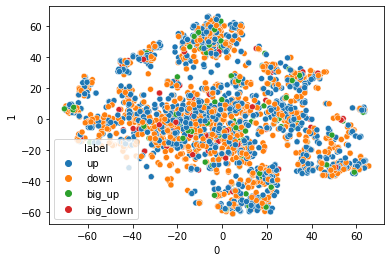

In [2]:
fine_tune_dict = {
  'fine-tuned-twelve-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 12, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-twenty_four-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 24, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-twelve-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 12, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-twenty_four-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 24, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
  'fine-tuned-three-months-corn': {'interval_feature': 'MonthYear', 'time_window': 3, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-six-months-corn': {'interval_feature': 'MonthYear', 'time_window': 6, 'label': 'MonthYearCornTrend', 'commodity': 'corn', 'interval': 'month',},
  'fine-tuned-three-months-soy': {'interval_feature': 'MonthYear', 'time_window': 3, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
  'fine-tuned-six-months-soy': {'interval_feature': 'MonthYear', 'time_window': 6, 'label': 'MonthYearSoyTrend', 'commodity': 'soybean', 'interval': 'month',},
  'fine-tuned-three-weeks-corn': {'interval_feature': 'WeekYear', 'time_window': 3, 'label': 'WeekYearCornTrend', 'commodity': 'corn', 'interval': 'week',},
  'fine-tuned-three-weeks-soy': {'interval_feature': 'WeekYear', 'time_window': 3, 'label': 'WeekYearSoyTrend', 'commodity': 'soybean', 'interval': 'week',},
}

import seaborn as sns
from sklearn.manifold import TSNE

# not tuned
X_tsne = TSNE(n_components=2,init='pca',perplexity=30).fit_transform(np.array(data_df['embedding'].to_list()))
df = pd.DataFrame(X_tsne)
df['label'] = data_df[fine_tune_dict[fine_tune]['label']].to_list()
sns.scatterplot(data=df, x=0, y=1, hue="label")

<AxesSubplot:xlabel='0', ylabel='1'>

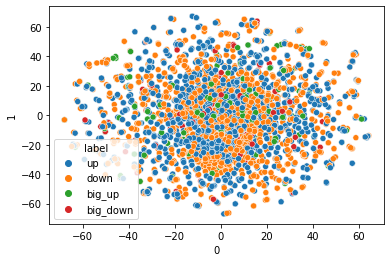

In [3]:
# tuned
X_tsne = TSNE(n_components=2,init='pca',perplexity=30).fit_transform(np.array(data_df['new_embedding'].to_list()))
df = pd.DataFrame(X_tsne)
df['label'] = data_df[fine_tune_dict[fine_tune]['label']].to_list()
sns.scatterplot(data=df, x=0, y=1, hue="label")